<a href="https://colab.research.google.com/github/nikimajidifard/resource-management-in-cloud-computing-based-on-predictive-resource-scaling/blob/main/resource_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#Load Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data from google drive
data = pd.read_csv('/content/drive/My Drive/final.csv')

In [ ]:
print("columns: ", data.columns)
print("data shape: ", data.shape)

columns:  Index(['TIME', 'CPU_USAGE', 'REQUESTS', 'AVERAGE_RESPONSE_TIME',
       'MEMORY_USAGE'],
      dtype='object')
data shape:  (10080, 5)


In [ ]:
random_data = data.sample(n=10)
print(random_data)

                     TIME  CPU_USAGE      REQUESTS AVERAGE_RESPONSE_TIME  \
2875  2023-12-19 23:55:00      15.70  301.03 req/s                114 ms   
7070  2023-12-22 21:50:00      15.00  235.32 req/s                124 ms   
3863  2023-12-20 16:23:00      15.10  287.53 req/s                109 ms   
7472   2023-12-23 4:32:00       5.45   88.90 req/s                121 ms   
1943   2023-12-19 8:23:00      10.60  187.72 req/s                112 ms   
553    2023-12-18 9:13:00      10.50  211.50 req/s                102 ms   
9828  2023-12-24 19:48:00      16.10  292.33 req/s                223 ms   
917   2023-12-18 15:17:00      14.20  235.67 req/s                101 ms   
2521  2023-12-19 18:01:00      14.60  261.40 req/s                112 ms   
2212  2023-12-19 12:52:00      16.10  302.62 req/s                112 ms   

     MEMORY_USAGE  
2875     18.4 GiB  
7070     19.4 GiB  
3863     20.2 GiB  
7472     17.6 GiB  
1943     15.8 GiB  
553      16.9 GiB  
9828     16.1 GiB  
917

# Data Preprocessing

Extract Times in Hours

In [ ]:
timestamps = data['TIME'].astype(str)

times = []
for timestamp in timestamps:
  timestamp = timestamp.split(" ")[1]
  hour= timestamp.split(":")[0]
  times.append(hour)

times = [float(x) for x in times]

In [ ]:
print("extracted hours: ", times)

extracted hours:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3

Exract CPU_Percentage

In [ ]:
CPU_Usage = data['CPU_USAGE'].astype(str)
CPU_Usage = [float(x) for x in CPU_Usage]

In [ ]:
print("cpu usage data: ", CPU_Usage)

cpu usage data:  [16.3, 13.7, 14.3, 14.0, 15.4, 14.2, 14.9, 13.4, 12.6, 12.8, 12.7, 13.9, 13.5, 13.1, 14.7, 13.0, 13.9, 12.7, 12.6, 12.6, 12.4, 12.4, 12.4, 13.1, 12.5, 13.9, 11.8, 15.4, 12.4, 13.4, 11.7, 11.9, 13.3, 11.5, 12.1, 12.3, 11.9, 11.7, 11.4, 12.0, 11.9, 12.3, 15.7, 14.5, 13.4, 12.1, 10.9, 12.2, 11.3, 11.2, 10.3, 10.4, 10.8, 11.2, 14.6, 11.0, 11.1, 10.9, 11.9, 10.7, 10.9, 15.5, 12.8, 10.3, 10.2, 10.2, 9.97, 9.66, 9.51, 9.91, 9.77, 9.52, 10.1, 9.69, 9.87, 10.4, 10.1, 9.9, 9.58, 9.94, 8.87, 10.9, 10.3, 11.5, 9.88, 10.3, 9.32, 8.92, 8.47, 8.97, 8.79, 8.9, 9.08, 8.76, 9.11, 9.1, 8.81, 9.83, 8.47, 8.81, 8.39, 8.67, 8.64, 12.9, 8.68, 7.93, 8.71, 8.34, 8.85, 9.21, 8.71, 9.04, 8.74, 8.76, 8.49, 9.21, 8.15, 10.1, 9.12, 8.27, 8.5, 8.35, 7.44, 8.01, 7.77, 7.85, 7.95, 8.25, 7.76, 8.82, 7.86, 7.84, 7.42, 7.47, 7.81, 7.63, 7.47, 7.23, 7.95, 9.1, 7.66, 7.56, 7.21, 7.84, 7.33, 7.49, 7.39, 7.62, 7.43, 7.55, 7.41, 7.71, 7.18, 7.01, 7.55, 7.47, 7.6, 7.54, 6.74, 6.69, 7.18, 7.31, 7.49, 6.82, 6.37

#Visualize Data

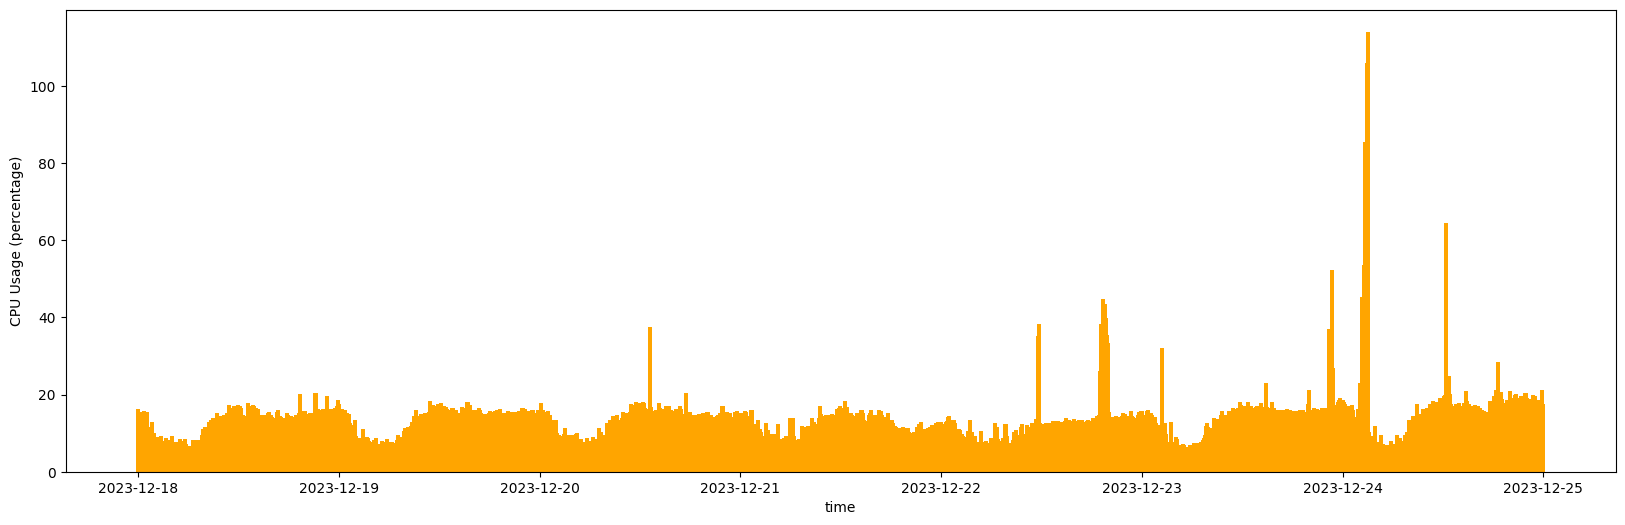

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(pd.to_datetime(data["TIME"]), CPU_Usage, width=0.02, color='orange')
plt.xlabel('time')
plt.ylabel('CPU Usage (percentage)')
plt.show()
plt.rcdefaults()  # Reset the default settings including figure size

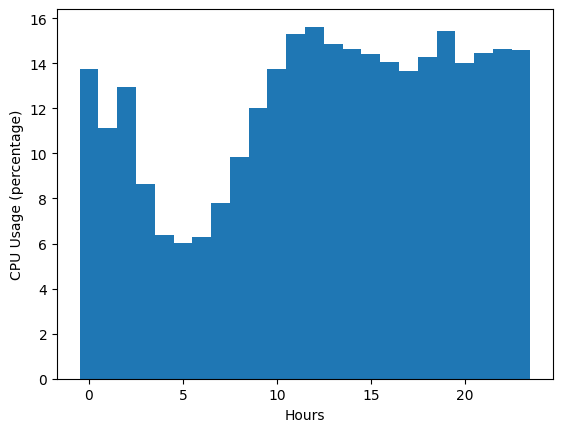

In [ ]:
# Calculate the average CPU usage for each hour
average_usage_dict = {}
for hour, usage in zip(times, CPU_Usage):
    if hour in average_usage_dict:
        average_usage_dict[hour].append(usage)
    else:
        average_usage_dict[hour] = [usage]

average_usage_list = []
for hour, usage_list in average_usage_dict.items():
    average_usage = sum(usage_list) / len(usage_list)
    average_usage_list.append((hour, average_usage))

# Extract hours and average usage from the list of tuples
hours = [hour for hour, usage in average_usage_list]
average_usage = [usage for hour, usage in average_usage_list]

x_axis = hours
y_axis = average_usage
plt.bar(x_axis, y_axis, width=1)
plt.xlabel("Hours")
plt.ylabel("CPU Usage (percentage)")
plt.show()



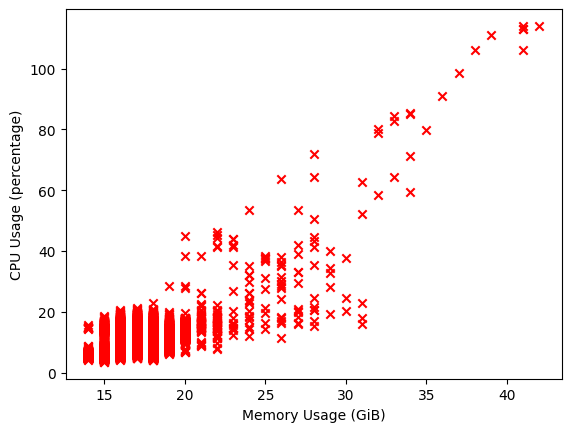

In [ ]:
memory_usages = []
for mem in data['MEMORY_USAGE']:
  mem = round(float(mem.split()[0]))
  memory_usages.append(mem)
plt.scatter(memory_usages, CPU_Usage, color='red', marker='x')
plt.xlabel('Memory Usage (GiB)')
plt.ylabel('CPU Usage (percentage)')
plt.show()

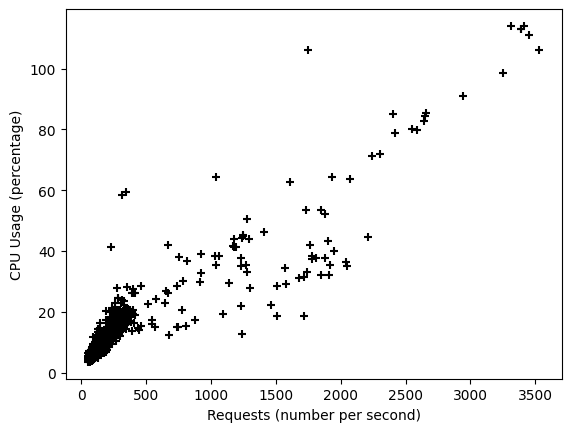

In [ ]:
reqs = []
for req in data['REQUESTS']:
    if 'K' in req:
      req = req.replace('K','')
      reqs.append(float(req.split()[0]) * 1000)
    else:
      reqs.append(float(req.split()[0]))

plt.scatter(reqs, CPU_Usage, marker='+', color='black')
plt.xlabel('Requests (number per second)')
plt.ylabel('CPU Usage (percentage)')
plt.show()

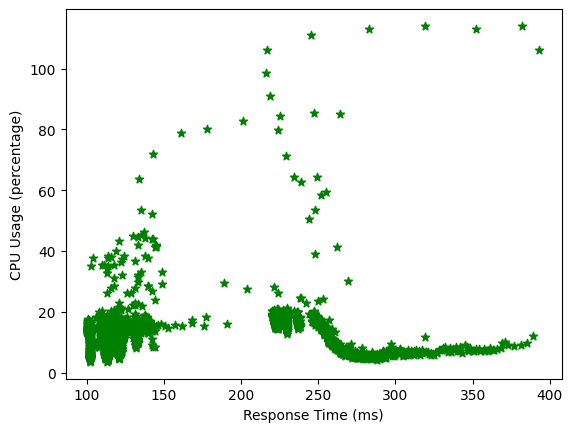

In [ ]:
response_times = []
for res in data['AVERAGE_RESPONSE_TIME']:
  res = float(res.split()[0])
  response_times.append(res)
plt.scatter(response_times, CPU_Usage, marker='*', color='green')
plt.xlabel('Response Time (ms)')
plt.ylabel('CPU Usage (percentage)')
plt.show()

#Markof

In [ ]:
states_dict = {"idle":[], "low":[], "high":[]}
for use in CPU_Usage:
  if use < 6:
    states_dict["idle"].append(use)
  elif 6 <= use < 10 :
    states_dict["low"].append(use)
  else:
    states_dict["high"].append(use)

print(states_dict)

{'idle': [5.78, 5.82, 5.98, 5.92, 5.96, 5.69, 5.61, 5.94, 5.89, 5.94, 5.58, 5.99, 5.74, 5.72, 5.99, 5.75, 5.79, 5.6, 5.73, 5.33, 5.32, 5.38, 5.16, 5.96, 5.29, 5.81, 5.34, 5.3, 5.61, 5.42, 5.12, 5.38, 5.02, 5.2, 4.87, 5.49, 4.84, 5.55, 5.43, 5.83, 5.21, 5.25, 5.01, 5.01, 5.19, 5.78, 4.64, 4.68, 5.32, 5.69, 4.89, 4.76, 4.87, 4.58, 4.73, 4.42, 5.28, 4.86, 4.98, 4.73, 4.82, 4.27, 4.59, 5.04, 5.32, 5.01, 4.71, 5.25, 5.13, 5.72, 5.73, 5.05, 5.17, 5.56, 5.42, 5.2, 4.89, 5.09, 5.21, 4.73, 4.65, 5.01, 5.25, 5.0, 5.33, 5.05, 4.78, 5.33, 4.69, 5.84, 5.8, 5.93, 5.37, 5.18, 5.55, 5.33, 5.24, 5.73, 5.0, 4.49, 4.54, 4.35, 5.84, 3.95, 5.62, 4.28, 4.69, 5.54, 5.25, 5.2, 4.17, 4.68, 4.06, 4.33, 4.27, 3.59, 4.81, 4.11, 4.56, 4.83, 4.54, 5.47, 4.39, 4.55, 4.91, 4.45, 5.41, 4.24, 5.61, 4.41, 4.93, 4.79, 5.3, 4.61, 5.97, 5.41, 5.07, 4.6, 4.48, 4.62, 4.71, 4.2, 5.21, 4.52, 4.62, 5.17, 4.65, 5.13, 4.81, 4.5, 4.6, 4.85, 4.89, 4.93, 4.93, 5.08, 5.71, 4.96, 4.91, 5.65, 5.66, 5.09, 4.99, 5.74, 5.52, 5.86, 5.4, 5.

In [ ]:
train_CPU_Usage = CPU_Usage[0:8000]
test_CPU_Usage = CPU_Usage[9000:]

states_dict = {"idle":{"idle":[0], "low":[0], "high":[0]}, "low":{"idle":[0], "low":[0], "high":[0]}, "high":{"idle":[0], "low":[0], "high":[0]}}
converted_to_states = []
idle_count, low_count, high_count = 0, 0, 0

for i in CPU_Usage:
  if i < 5 :
    converted_to_states.append("idle")
  elif i <= 7 :
    converted_to_states.append("low")
  else:
    converted_to_states.append("high")


for i in range(len(train_CPU_Usage) - 1):
    current_usage = train_CPU_Usage[i]
    next_usage = train_CPU_Usage[i + 1]

    if current_usage < 5:
        usage_category = "idle"
        idle_count += 1

    elif 5 <= current_usage <= 7:
        usage_category = "low"
        low_count += 1

    else:
        usage_category = "high"
        high_count += 1

    if next_usage < 5:
        states_dict[usage_category]["idle"][0] += 1
    elif 5 <= next_usage <= 7:
        states_dict[usage_category]["low"][0] += 1
    else:
        states_dict[usage_category]["high"][0] += 1

def get_total_state_count(state):
    if state == "idle":
        return idle_count
    elif state == "low":
        return low_count
    else:
        return high_count

for state in states_dict:
  for next_state in states_dict[state]:
      states_dict[state][next_state].append(states_dict[state][next_state][0] / get_total_state_count(state))

print(states_dict)

{'idle': {'idle': [42, 0.3888888888888889], 'low': [61, 0.5648148148148148], 'high': [5, 0.046296296296296294]}, 'low': {'idle': [61, 0.05606617647058824], 'low': [810, 0.7444852941176471], 'high': [217, 0.19944852941176472]}, 'high': {'idle': [5, 0.0007349698662354843], 'low': [217, 0.03189769219462002], 'high': [6581, 0.9673673379391445]}}


In [ ]:
test_converted_to_states = converted_to_states[9000:]

def predict_future_states(current_state, states_dict):
    next_states =[]
    total_weight = 0
    for key, value in states_dict[current_state].items():
        total_weight += value[1]
        next_states.append([value[1],key])

    random_number = random.random()
    next_states.sort(key = lambda x : x[0])
    if random_number <= (next_states[0][0]) / total_weight:
        return next_states[0]
    elif random_number <= ((next_states[1][0]) / total_weight):
        return next_states[1]
    else:
        return next_states[2]

#dependent to previous state
def fpredicted_states_dep():
  predicted_states_dep =[]
  for i in range(len(test_CPU_Usage)):
    if i == 0:
      current_state = test_converted_to_states[0]
    else:
        current_state = predicted_state[1]
    predicted_state = predict_future_states(current_state, states_dict)
    predicted_states_dep.append(predicted_state[1])
  k = 0
  for i in range(len(test_converted_to_states)):
    if predicted_states_dep[i] == test_converted_to_states[i] :
      k += 1
  approximation_error_dep = k / len(predicted_states_dep)
  return (approximation_error_dep)


#independent to previous state
def fpredicted_states_indep():
  predicted_states_indep = []
  for i in test_converted_to_states:
    predicted_states_indep.append(predict_future_states(i,states_dict)[1])
  p = 0
  for i in range(len(test_converted_to_states)):
    if predicted_states_indep[i] == test_converted_to_states[i] :
      p += 1
  approximation_error_indep = p / len(predicted_states_indep)
  return (approximation_error_indep)

print(fpredicted_states_dep())
print(fpredicted_states_indep())
######

0.7953703703703704
0.9527777777777777


#linear regression

In [ ]:
raw_data = data.to_numpy()

main_data = []
for row in raw_data:
  is_nan = False
  for feature in row:
    if pd.isna(feature):
      is_nan = True
      break
  if not is_nan:
    main_data.append(row)

big_data = np.array(main_data)
print(big_data)
## har koddom

[['2023-12-18 0:00:00' 16.3 '301.78 req/s' '103 ms' '17.6 GiB']
 ['2023-12-18 0:01:00' 13.7 '243.00 req/s' '103 ms' '16.8 GiB']
 ['2023-12-18 0:02:00' 14.3 '292.67 req/s' '103 ms' '17.3 GiB']
 ...
 ['2023-12-24 23:57:00' 16.8 '288.97 req/s' '223 ms' '16.8 GiB']
 ['2023-12-24 23:58:00' 16.6 '326.60 req/s' '223 ms' '17.3 GiB']
 ['2023-12-24 23:59:00' 16.0 '263.30 req/s' '223 ms' '17.0 GiB']]


In [ ]:
def get_first_part(element):
    if 'K' in element:
      element = element.replace('K', '')
      return float(element.split()[0]) * 1000
    else:
      return float(element.split()[0])

requests = np.vectorize(get_first_part)(big_data[:,2:3])
responses = np.vectorize(get_first_part)(big_data[:,3:4])
mems = np.vectorize(get_first_part)(big_data[:,4:5])
ntimes= np.array(times).reshape(-1, 1)
X = np.hstack((ntimes,requests,responses, mems))
Y = big_data[:,1]


In [ ]:
print(X)

[[  0.   301.78 103.    17.6 ]
 [  0.   243.   103.    16.8 ]
 [  0.   292.67 103.    17.3 ]
 ...
 [ 23.   288.97 223.    16.8 ]
 [ 23.   326.6  223.    17.3 ]
 [ 23.   263.3  223.    17.  ]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)

Mean Squared Error (MSE): 3.8452647157760866
Root Mean Squared Error (RMSE): 1.9609346536221157
R-squared (R2) Score: 0.9003199147963227
Mean Absolute Error (MAE): 1.280075937759166
[15.3 13.7 15.0 ... 10.2 16.0 14.7]
[14.12899359 12.4696896  16.01798793 ...  9.22713839 16.71392984
 13.04889689]


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.2)


model = LinearRegression()

model.fit(X_train, Y_train)

predicted_cpu_usage = model.predict(X_test)

mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)

# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


print(Y_test)
print(predicted_cpu_usage)


Mean Squared Error (MSE): 1.7066830445033183
Root Mean Squared Error (RMSE): 1.3064007978041494
R-squared (R2) Score: 0.9551504733186487
Mean Absolute Error (MAE): 0.686270578334374
[6.82 14.3 15.3 ... 12.1 8.09 5.8]
[ 7.87924841 14.67810473 16.17142244 ... 12.29193618  9.43862261
  6.42473515]


#Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
# custom_optimizer = SGD(lr=0.001)
# model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=128, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/128
114/114 [==============================] - 1s 4ms/step - loss: 108.4780 - val_loss: 1.8220
Epoch 2/128
114/114 [==============================] - 0s 3ms/step - loss: 3.8475 - val_loss: 1.3968
Epoch 3/128
114/114 [==============================] - 0s 3ms/step - loss: 4.2508 - val_loss: 3.1353
Epoch 4/128
114/114 [==============================] - 0s 3ms/step - loss: 3.8098 - val_loss: 1.2511
Epoch 5/128
114/114 [==============================] - 0s 3ms/step - loss: 3.4361 - val_loss: 1.2192
Epoch 6/128
114/114 [==============================] - 0s 4ms/step - loss: 6.1214 - val_loss: 2.3843
Epoch 7/128
114/114 [==============================] - 0s 3ms/step - loss: 3.7258 - val_loss: 1.4860
Epoch 8/128
114/114 [==============================] - 0s 3ms/step - loss: 3.3858 - val_loss: 1.1946
Epoch 9/128
114/114 [==============================] - 0s 4ms/step - loss: 3.9432 - val_loss: 1.1671
Epoch 10/128
114/114 [==============================] - 1s 5ms/step - loss: 5.4335 - val_

In [ ]:
predicted_cpu_usage = model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

63/63 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 1.7820921092832633
Root Mean Squared Error (RMSE): 1.3349502272681417
R-squared (R2) Score: 0.9538031562390618
Mean Absolute Error (MAE): 0.7049968153900571
[15.3 13.7 15.0 14.7 12.9 15.5 14.4 16.0]
[[15.830866]
 [13.395926]
 [16.496351]
 [14.69837 ]
 [11.23    ]
 [15.505402]
 [15.24284 ]
 [15.804861]]


#RNN Model

In [ ]:
X.shape

(10080, 4)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Assuming x and y are already defined and preprocessed
# x should be shaped as (num_samples, sequence_length, num_features)
# y should be shaped as (num_samples, num_features)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train.astype('float32'), Y_train.astype('float32'), epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
202/202 [==============================] - 13s 27ms/step - loss: 31.8597 - val_loss: 3.7455
Epoch 2/100
202/202 [==============================] - 3s 15ms/step - loss: 10.6771 - val_loss: 9.2251
Epoch 3/100
202/202 [==============================] - 3s 13ms/step - loss: 5.6757 - val_loss: 3.3762
Epoch 4/100
202/202 [==============================] - 2s 10ms/step - loss: 4.3068 - val_loss: 3.7009
Epoch 5/100
202/202 [==============================] - 2s 10ms/step - loss: 5.1044 - val_loss: 4.2911
Epoch 6/100
202/202 [==============================] - 2s 11ms/step - loss: 4.6729 - val_loss: 3.6505
Epoch 7/100
202/202 [==============================] - 2s 10ms/step - loss: 5.3023 - val_loss: 10.0740
Epoch 8/100
202/202 [==============================] - 4s 18ms/step - loss: 5.1308 - val_loss: 2.7578
Epoch 9/100
202/202 [==============================] - 2s 10ms/step - loss: 4.3194 - val_loss: 3.1434
Epoch 10/100
202/202 [==============================] - 2s 10ms/step - loss: 4

In [ ]:
predicted_cpu_usage = model.predict(X_test.astype('float32'))


mse = metrics.mean_squared_error(Y_test, predicted_cpu_usage)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = metrics.r2_score(Y_test, predicted_cpu_usage)
print("R-squared (R2) Score:", r2)


# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(Y_test, predicted_cpu_usage)
print("Mean Absolute Error (MAE):", mae)


print(Y_test[:8])
print(predicted_cpu_usage[:8])

63/63 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 1.684656683563167
Root Mean Squared Error (RMSE): 1.2979432512876543
R-squared (R2) Score: 0.9529135326341358
Mean Absolute Error (MAE): 0.6575271210405562
[13.8 8.55 14.0 14.1 9.16 15.1 15.9 15.4]
[[13.672819 ]
 [ 6.9301453]
 [12.084968 ]
 [14.411355 ]
 [ 8.354773 ]
 [14.385508 ]
 [16.395227 ]
 [15.642137 ]]
